# Plot the waveforms of possible cracking events recorded on hydrophones

In [7]:
# Imports
from utils_basic import ROOTDIR_HYDRO as rootdir
from utils_basic import freq2suffix, get_hydrophone_coords, time2suffix
from utils_preproc import read_and_process_windowed_hydro_waveforms
from utils_plot import freq_band_to_label, plot_cascade_zoom_in_hydro_waveforms, save_figure


In [8]:
# Inputs
## Data
station = "A00"
locations_to_plot = ["03", "04", "05", "06"]
starttimes = ["2019-05-01T08:45:30Z", "2019-05-01T08:45:40Z"]
durations = [20.0, 3.0] # duration in seconds
major_time_spacings = [10.0, 2.0] # in seconds
minor_time_spacings = [2.0, 0.2] # in seconds

## Preprocessing
freqmin = None
freqmax = None

## Plotting
scale = 15.0
depth_lim = (140, 520) # in meters
location_label_offset = (0.5, -15)
scalebar_length = 0.5 # in seconds



In [9]:
# Read and preprocess the data
starttime = starttimes[0]
duration = durations[0]
sta_df = get_hydrophone_coords()
stream = read_and_process_windowed_hydro_waveforms(starttime, duration, stations = station, freqmin = freqmin, freqmax = freqmax)

In [10]:
depth = sta_df.loc[(sta_df["station"] == station) & (sta_df["location"] == "01"), "depth"].values[0]

Text(0.5, 0.92, 'Raw Data')

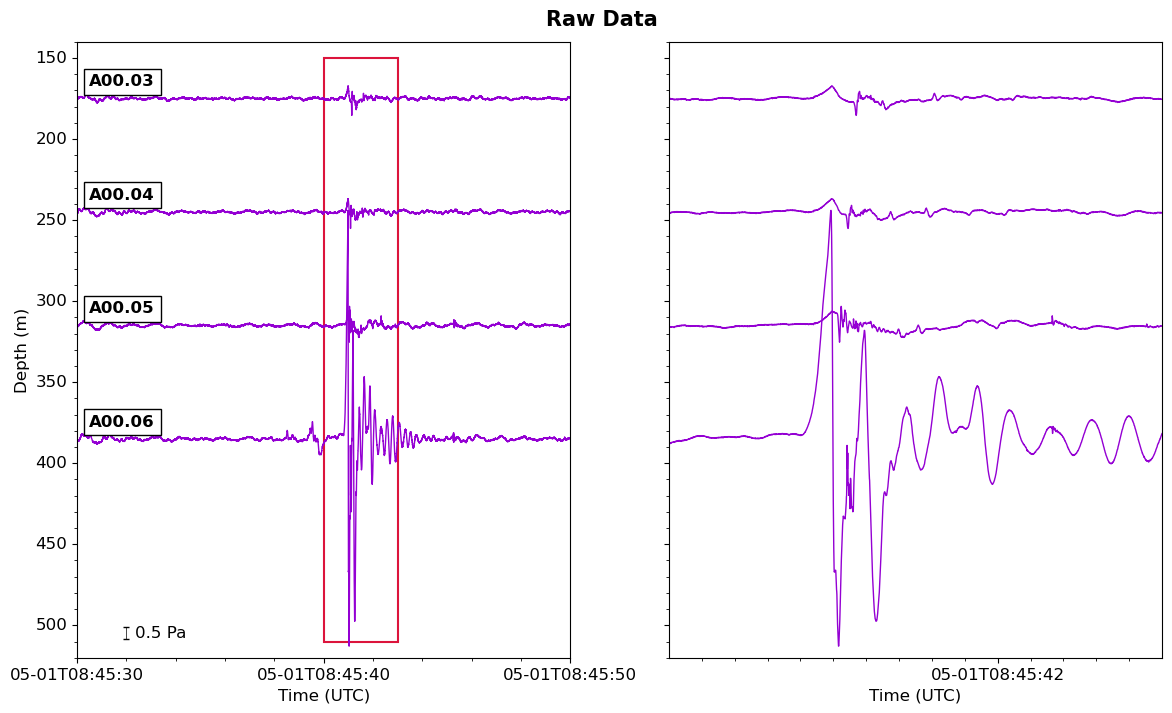

In [11]:
# Plotting
window_dict = {"starttimes": starttimes, "durations": durations, "major_time_spacings": major_time_spacings, "minor_time_spacings": minor_time_spacings}
fig, axes = plot_cascade_zoom_in_hydro_waveforms(stream, sta_df, window_dict, 
                                                 station_to_plot=station, locations_to_plot=locations_to_plot, scale=scale, location_label_offset=location_label_offset, depth_lim=depth_lim, scalebar_length=scalebar_length)

title = freq_band_to_label(freqmin, freqmax)
fig.suptitle("Raw Data", fontsize=15, fontweight="bold", y=0.92)

In [12]:
# Save the figure
starttime0 = starttimes[0]
time_suffix = time2suffix(starttime0)
freq_suffix = freq2suffix(freqmin, freqmax)
figname = f"cracking_event_on_hydro_cascade_zoom_in_{station}_{time_suffix}_{freq_suffix}.png"

save_figure(fig, figname, outdir = rootdir)

Figure saved to /Volumes/OmanData/data/hydrophones/cracking_event_on_hydro_cascade_zoom_in_A00_20190501T084530_no_filter.png
